In [10]:
import numpy as np 
from scipy import optimize
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display # For interactive figure
from ipywidgets import interact, IntSlider, Play, Dropdown

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})



plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.0
plt.rcParams["axes.xmargin"] = 0.01
plt.rcParams["axes.xmargin"] = 0.01
plt.rcParams["legend.edgecolor"] = "black"

# local modules
import ModelNikolas1
from ModelNikolas1 import ASAD

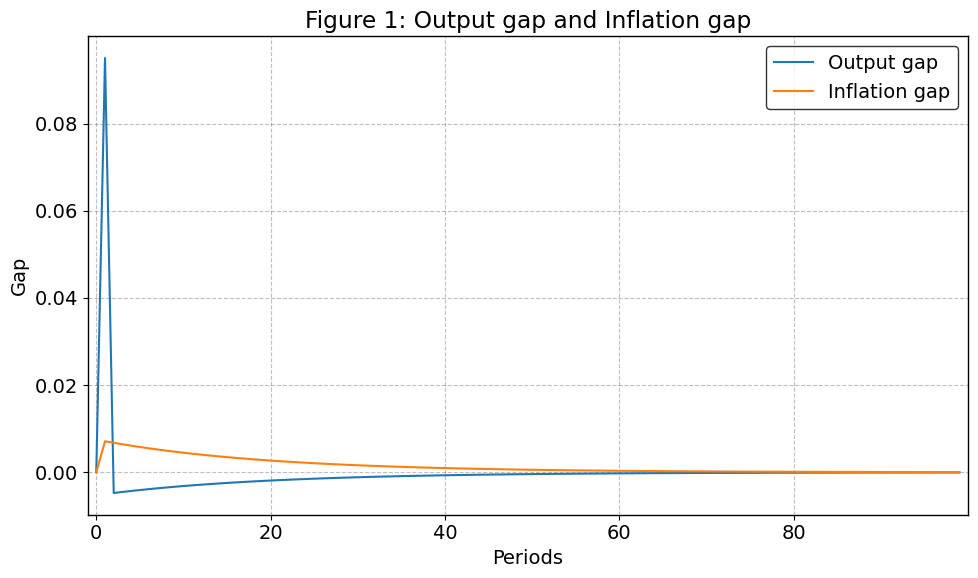

In [11]:
# Instantiate the ASAD model with parameters
model = ASAD(T=100, z=0.1, z_duration=1)

# Solve the model
model.solve_model()

# Plot the output gap and inflation gap
model.plot_results()

In [20]:
def plot_wrapper(T, shock_type): 
    
    if shock_type == 'positive demand shock': 
        z = 0.01
        s = 0
        z_duration = 1
        s_duration = 0
        
    elif shock_type == 'negative demand shock': 
        z = -0.01
        s = 0
        z_duration = 1
        s_duration = 0
        
    elif shock_type == 'positive supply shock':
        z = 0
        s = -0.01
        z_duration = 0
        s_duration = 1
        
    elif shock_type == 'negative supply shock':
        z = 0
        s = 0.01
        z_duration = 0
        s_duration = 1
        
    # Instantiate the ASAD model with parameters and solve the model with the choosen shock valeus
    
    asad_model = ASAD(T=T, z=z, s=s, gamma=1, alpha=0.8, z_duration=z_duration, s_duration=s_duration) 
    asad_model.solve_model()
    asad_model.plot_ad_as() # Removed the asad_model.plot_results() line
    
periods = Play(value=0,min=0,max=10,step=1,interval=1000,description="Press play",disabled=False) # Added the periods argument

shock_dropdown = Dropdown(options=['positive demand shock', 'negative demand shock', 'positive supply shock', 'negative supply shock'], value='positive demand shock',
    description='Shock type:',disabled=False) # Added the shock_dropdown argument & changed the options

# Adding the slider value to the plot_wrapper function

slider = widgets.IntSlider()
widgets.jslink((periods, 'value'), (slider, 'value'))
widgets.HBox([periods, slider, shock_dropdown])
interact(plot_wrapper, T=periods, shock_type=shock_dropdown)

interactive(children=(Play(value=0, description='Press play', interval=1000, max=10), Dropdown(description='Sh…

<function __main__.plot_wrapper(T, shock_type)>

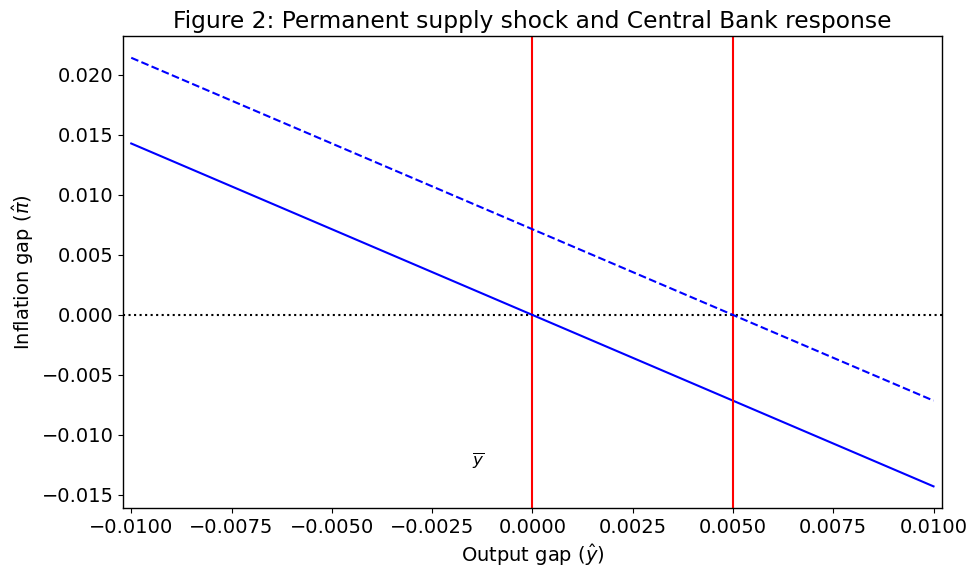

In [13]:
asad_model = ASAD(T=2, z=0, s=-0.005, gamma=1,z_duration=0, s_duration=2) #Solve and plot the model with a permanent negative supply shock
asad_model.solve_model()
asad_model.plot_ad_as()

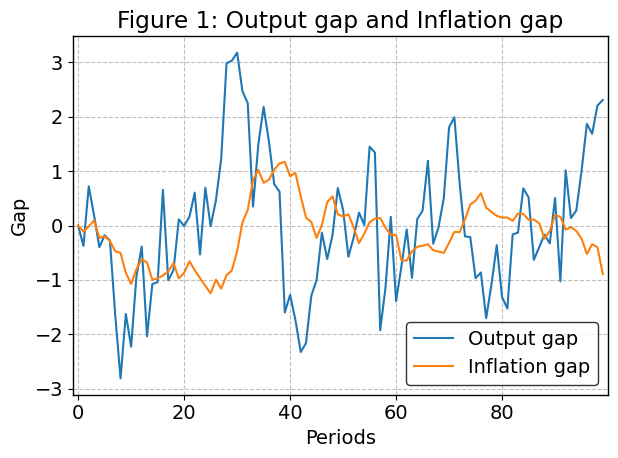

In [15]:
# Create an instance of the ASAD class with your desired parameters
asad_model = ASAD(T=100, alpha=1,gamma=0.075)

# Solve the model to generate yhat_vec and pihat_vec
asad_model.solve_model()

# Call the social_loss_function method on the instance
asad_model.solve_stochastic_shock(seed=1917)  # Add your seed here.
asad_model.social_loss_function()

plt.plot(asad_model.t_vec, asad_model.yhat_vec_stoc, label="Output gap") # Plot the output gap
plt.plot(asad_model.t_vec, asad_model.pihat_vec_stoc, label="Inflation gap") # Plot the inflation gap
plt.xlabel("Periods") # Label the x-axis
plt.ylabel("Gap") # Label the y-axis
plt.title("Figure 1: Output gap and Inflation gap") # Add a title
plt.legend() 
plt.show()

The average optimal value of alpha over 100 simulations is: 3.5327
The standard deviation of the optimal value of alpha over 100 simulations is: 1.6914
The average social loss over 100 simulations is: 66.2992


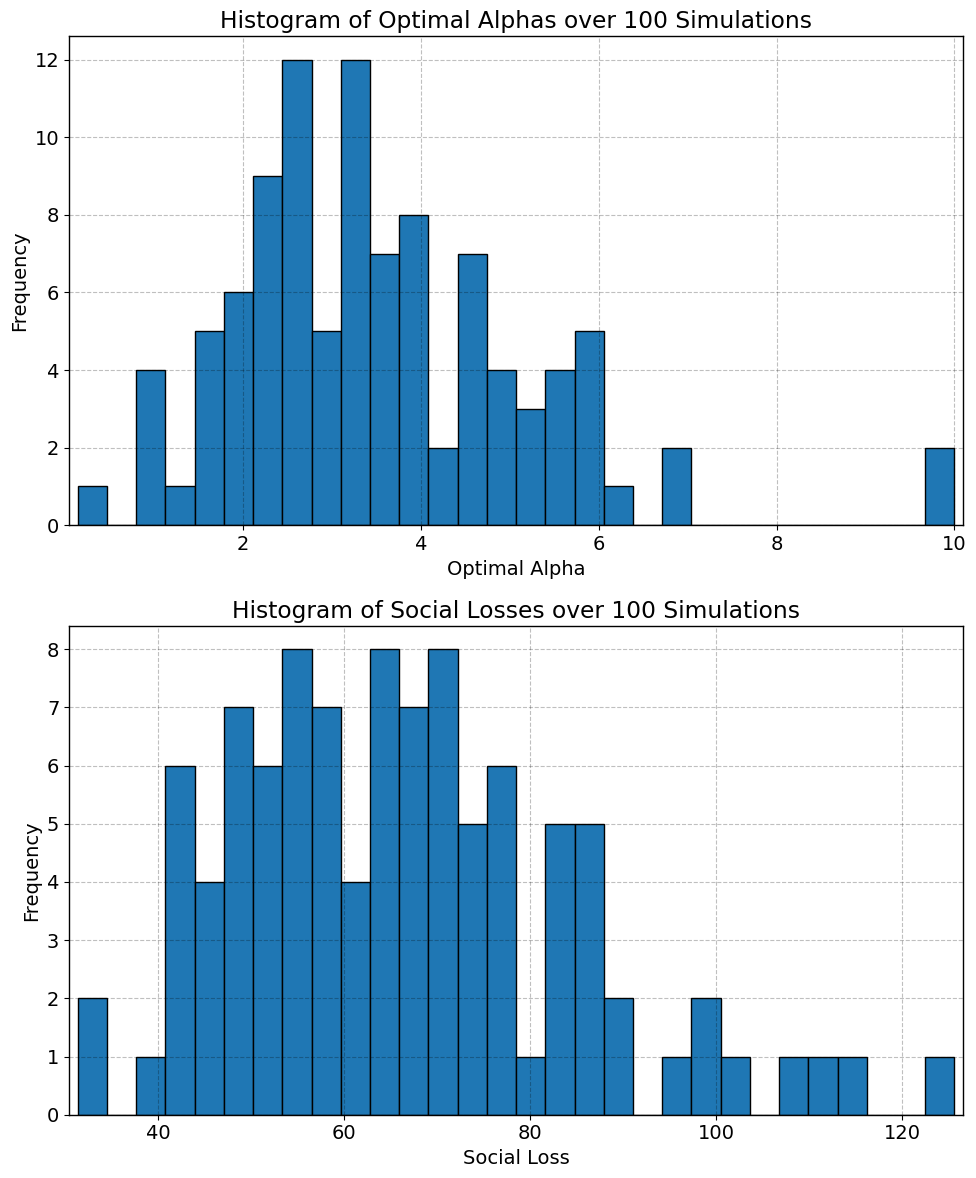

In [19]:
# Initialize lists to store results
all_optimal_alphas = []
all_social_losses = []

# Optimization bounds and initial guess
bound = ((1e-8, 10))
alpha0 = [1]

num_simulations = 100  # Number of simulations

for i in range(num_simulations):
    # Set a different seed for each simulation
    seed = i

    # Create an instance of the ASAD class with your desired parameters
    asad_model = ASAD(T=100, alpha=1, gamma=0.075)

    # Minimize the social loss function for the given seed
    result = optimize.minimize(asad_model.social_loss_alpha, alpha0, args=(seed,), method="Nelder-Mead", bounds=[bound])

    # Extract the optimal alpha value and social loss
    optimal_alpha = result.x[0]
    social_loss = result.fun

    # Append the results to our lists
    all_optimal_alphas.append(optimal_alpha)
    all_social_losses.append(social_loss)

# Calculate the average optimal alpha value and standard deviation
avg_optimal_alpha = np.mean(all_optimal_alphas)
std_optimal_alpha = np.std(all_optimal_alphas)

# Calculate the average social loss
avg_social_loss = np.mean(all_social_losses)

# Print the average optimal alpha value, standard deviation, and average social loss
print(f"The average optimal value of alpha over {num_simulations} simulations is: {avg_optimal_alpha:.4f}")
print(f"The standard deviation of the optimal value of alpha over {num_simulations} simulations is: {std_optimal_alpha:.4f}")
print(f"The average social loss over {num_simulations} simulations is: {avg_social_loss:.4f}")

# Create subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot the histogram of optimal alphas
axs[0].hist(all_optimal_alphas, bins=30, edgecolor='black')
axs[0].set_title(f'Histogram of Optimal Alphas over {num_simulations} Simulations')
axs[0].set_xlabel('Optimal Alpha')
axs[0].set_ylabel('Frequency')

# Plot the histogram of social losses
axs[1].hist(all_social_losses, bins=30, edgecolor='black')
axs[1].set_title(f'Histogram of Social Losses over {num_simulations} Simulations')
axs[1].set_xlabel('Social Loss')
axs[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show() 